In [ ]:
#!/usr/bin/env python
#-*- conding:utf-8 -*-
# @AUTHOR: Gui-Yan Xie
# @CONTACT: xieguiyan at hust dot edu dot cn
# @DATE: 2021-11-16 15:31:42
# @DESCRIPTION: 
# @FILE: 01-plot.py
import seaborn as sns
import re
import string
import numpy as np
from numpy.random import randn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
sns.set()

In [ ]:
# Reads length distribution
plt.figure(dpi=300, figsize=(8, 4))
read=pd.read_table('../tmp_result/SRR8185773.freq.stat',sep='\t',header=None, skipfooter=1)
read.columns=['Read length','count','Read count percentage']
read_len = sns.lineplot(x='Read length',y='Read count percentage',data=read)

In [ ]:
read_len.get_figure().savefig('/home/xiegy/github/EVAtool/test/tmp_result/test.png')
# read_len.get_figure().savefig('/home/xiegy/github/EVAtool/test/tmp_result/test.pdf')

In [ ]:
# Read type distribution
plt.figure(dpi=300, figsize=(8, 4))
ncrna_type = pd.read_table('../tmp_result/SRR8185773.stat', header=None, sep='\t',skiprows=4, dtype=str)
ncrna_type.columns = ['Category','MappingTag', 'Ratio']
ncrna_type['Ratio'] = ncrna_type['Ratio'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)/100
read_type =sns.barplot(x='Category',y='Ratio',data=ncrna_type)
read_type.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))

In [ ]:
read_type.get_figure().savefig('/home/xiegy/github/EVAtool/test/tmp_result/test2.png')
# read_type.get_figure().savefig('/home/xiegy/github/EVAtool/test/tmp_result/distribution_of_ncRNA_type.pdf')

In [ ]:
# Reads type distribution pie chart
plt.figure(dpi=300, figsize=(4, 8))
read_type_pie = pd.read_table('../tmp_result/SRR8185773.stat', header=None, sep='\t',skiprows=4, dtype=str)
read_type_pie.columns = ['Category','MappingTag', 'Ratio']
read_type_pie['Ratio'] = read_type_pie['Ratio'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)
read_type_map = pd.read_table('../tmp_result/SRR8185773.stat', header=None, sep=':',skiprows=1,dtype=str)
unmap_ratio = list(re.findall(r"\((.*)%\)", read_type_map[0:2][1][1]))
unmap_ratio_f = [float(i) for i in unmap_ratio]
all_ratio = list(read_type_pie['Ratio'])+unmap_ratio_f
all_category = list(read_type_pie['Category'])+['unmapped']
all_labels = ['{0} - {1:1.2f}%'.format(i,j) for i,j in zip(all_category, all_ratio)]

plt.pie(all_ratio)

plt.legend(labels=all_labels,
        bbox_to_anchor=(1.15,0.5), 
        loc='center',
        frameon=False,
        fontsize=7)

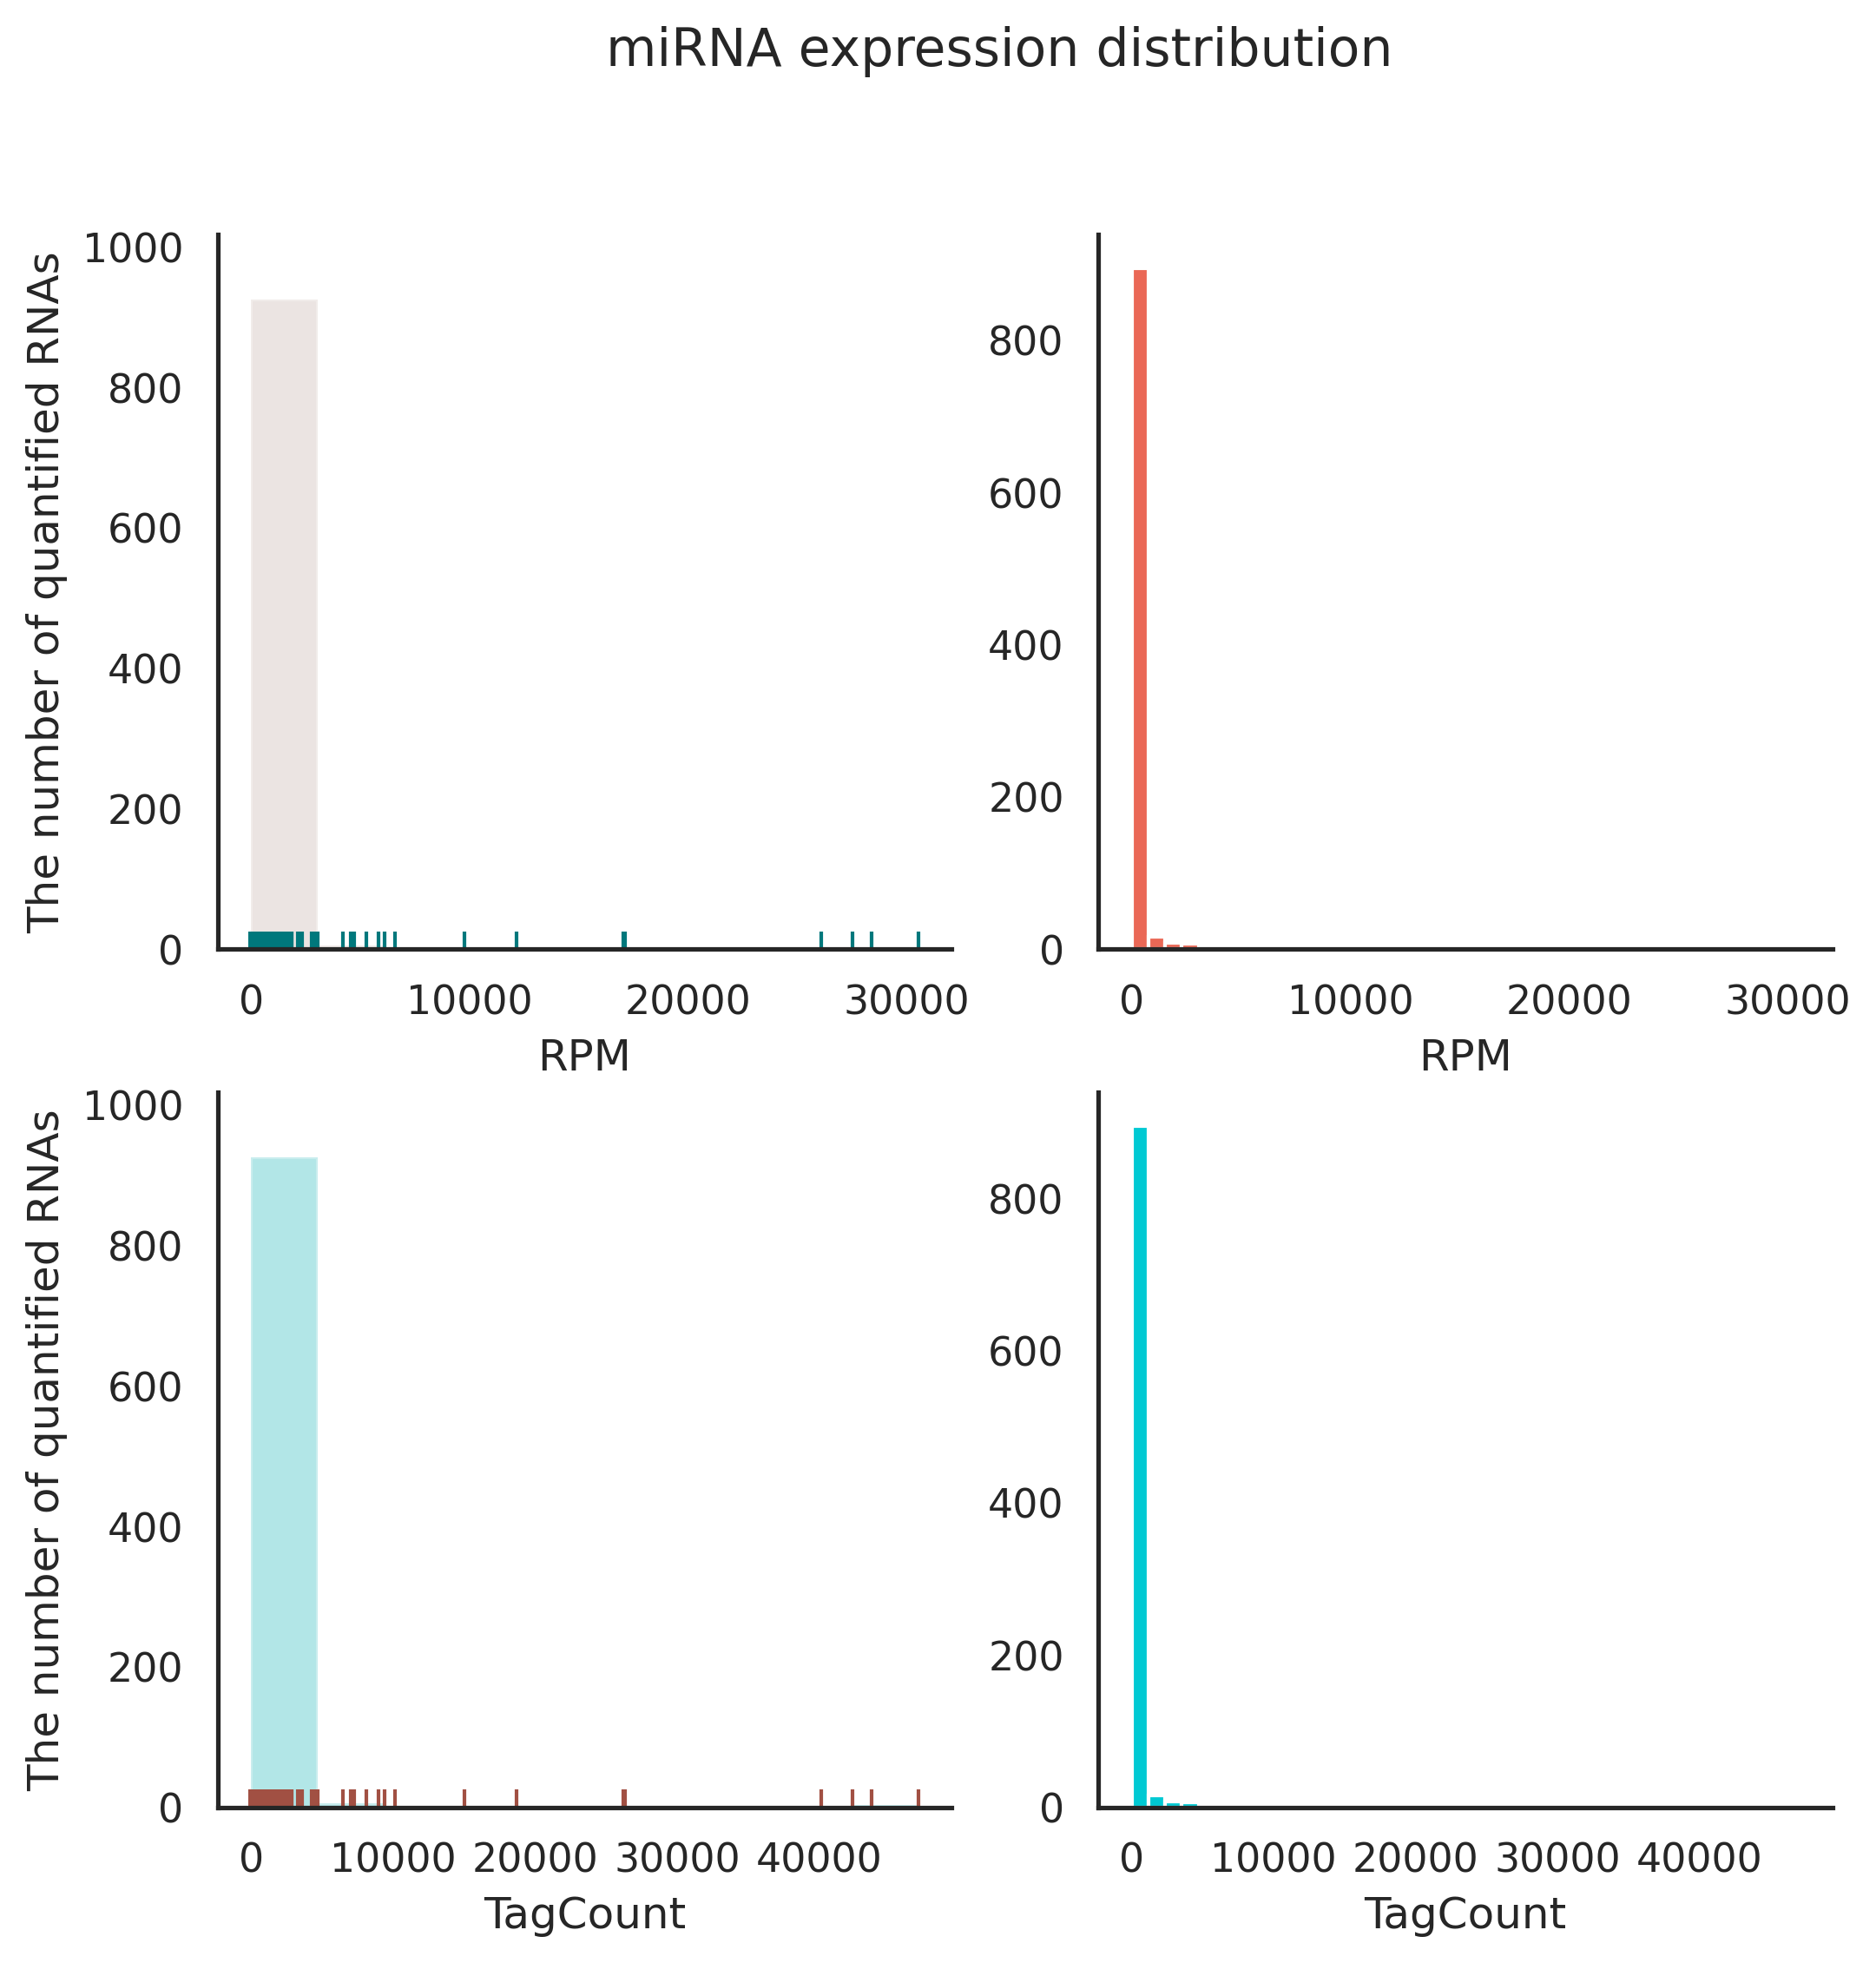

In [44]:
# RPM and TagCount distributions in different ncRNAs
plt.figure(dpi=300, figsize=(8, 8))
read_expr = pd.read_table('../tmp_result/SRR8185773.miRNA.exp')
plt.suptitle('miRNA expression distribution')
sns.set_style("white")
#RPM high level
plt.subplot(2,2,1)
plt.hist(read_expr['RPM'], alpha=0.3, color='#BEA6A1')
sns.rugplot(read_expr['RPM'], color='#00787C')
sns.despine()
plt.ylabel('The number of quantified RNAs')
#RPM hist
plt.subplot(2,2,2)
plt.hist(read_expr['RPM'],bins=40,facecolor='#EA6856')
plt.xlabel('RPM')
#TagCount
plt.subplot(2,2,3)
plt.hist(read_expr['TagCount'], alpha=0.3, color='#00ADB1')
sns.rugplot(read_expr['TagCount'], color = '#A15043')
sns.despine()
plt.ylabel('The number of quantified RNAs')
#TagCount hist
plt.subplot(2,2,4)
test_fig = plt.hist(read_expr['TagCount'],bins=40,facecolor='#00C9D3')
sns.despine()
plt.xlabel('TagCount')
plt.savefig('/home/xiegy/github/EVAtool/test/tmp_result/test_merge.png')




In [ ]:
# count in different ncRNAs
ncrna_type = ['miRNA','YRNA','snRNA','snoRNA','tRNA','rRNA','scRNA']
rna_count = []
for i in ncrna_type:
    count = len(open(f'../tmp_result/SRR8185773.{i}.exp','r').readlines()) - 1
    rna_count.append(count)
plt.figure(dpi=300, figsize=(8, 4))
plt.plot(ncrna_type,rna_count,'r',lw=2, color = '#EA6856')
sns.despine()
plt.xlabel('ncRNA type')
plt.ylabel('The number of identifed RNAs')
plt.savefig("/home/xiegy/github/EVAtool/test/tmp_result/test_line.png")